In [104]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

from scipy.integrate import odeint
from scipy.optimize import fmin
import os

# Figure 1

In [113]:
def init_fig(aspect=(4,3),fontsize=16,n=1):
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=fontsize)
    plt.rc('ytick', labelsize=fontsize)
    plt.rc('axes', labelsize=fontsize)
    params = {'legend.fontsize': 'larger',
              'legend.handlelength': 2}
    plt.rcParams.update(params)

    fig,axs = plt.subplots(n, 1, sharey=False,sharex=True,figsize = aspect)
    plt.subplots_adjust(wspace=0, hspace=0)
    if n==1:
        axs = [axs,]
    return axs,fig
    
def paper_ready_fig(result,ylabel,ymin,ymax):
    ax,fig = init_fig()
    
    ax.semilogy(result, color='k', ls='solid')
    plt.ylim((ymin,ymax))
    ax.set_xlabel('iteration')
    ax.set_ylabel(ylabel)
    #plt.ylim(ymin,ymax)
    
def gen_dir(dirname):
    path = None
    if not dirname==None:
        path  = os.sep.join(["..","..","figs",dirname])
        #os.rmdir(path)
        if not os.path.exists(path):
            os.mkdir(path)
    return path


In [122]:
def plot_data(datasets_list,baseline,dirname,fname):
    if not fname == None:
        path = gen_dir(dirname)
    n = len(datasets_list)
    widths = (3.5,2,3.5)
    cols = ('k','gray','purple')
    axs,fig = init_fig(aspect=(3,3*n),n=n)
    
    for datasets,ax in zip(datasets_list,axs):
        for dat,col,width in zip(datasets,cols[:len(datasets)],widths[:len(datasets)]):
            ax.errorbar(dat[:,0],dat[:,1]/baseline,yerr=dat[:,-1]/baseline, fmt='o',color=col)
            ax.plot(dat[:,0],dat[:,1]/baseline,color=col,linewidth=width)
        ymax = np.max([np.max((dat[:,1]+dat[:,-1])/baseline) for dat in datasets])
        ax.set_ylim((0,1.1*ymax))
        if not fname == None:
            fig.savefig(os.path.join(path,fname + "_experiment.pdf"),bbox_inches='tight')   


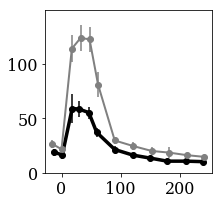

In [123]:
"""
Major depressive disorders. 
Data from:
Data from Blunting of ACTH response to human CRH in depressed patients is avoided by metyrapone pretreatment 
von Bardeleben et al.
https://www.ncbi.nlm.nih.gov/pubmed/2852510
"""

data_depr_ACTH = np.matrix([(-0.21, 18.98, 3.24), (0.02, 16.2, 3.24), (0.3, 58.8, 12.96), (0.49, 58.33, 7.41), (0.77, 55.09, 5.56), (0.99, 37.04, 4.16), (1.5, 21.3, 2.77), (2.01, 16.2, 1.86), (2.5, 13.43, 0.92), (2.98, 10.65, 1.85), (3.51, 10.65, 0.46), (4.0, 10.19, 0.92)])
data_healthy_ACTH = np.matrix([(-0.26, 26.43, 3.47), (0.0, 21.53, 4.36), (0.29, 113.58, 12.62), (0.54, 123.48, 12.18), (0.79, 122.06, 11.74), (1.03, 80.66, 11.31), (1.5, 29.58, 3.47), (2.01, 24.58, 3.47), (2.54, 19.99, 3.49), (3.03, 18.48, 5.23), (3.55, 16.08, 1.74), (4.03, 14.57, 1.29)])
data_meth_ACTH  = np.matrix([(-0.22, 75.36, 9.84), (0.03, 71.09, 10.3), (0.29, 178.29, 25.76), (0.54, 186.19, 34.66), (0.82, 204.86, 37.01), (1.04, 159.38, 31.85), (1.51, 100.72, 19.67), (2.0, 79.53, 15.45), (2.48, 70.05, 10.29), (3.01, 75.54, 17.33), (3.49, 67.47, 15.92), (3.98, 76.72, 23.42)])
for data in (data_depr_ACTH,data_healthy_ACTH,data_meth_ACTH):
    data[:,0] = data[:,0]*60

plot_data(((data_depr_ACTH,data_healthy_ACTH),),
          1,fname='ACTH_CRH_CHALLENGE',dirname="DEPRESSION_DATA")



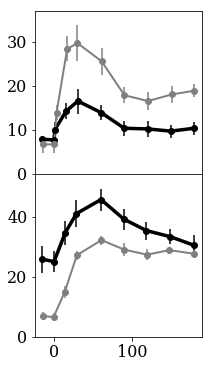

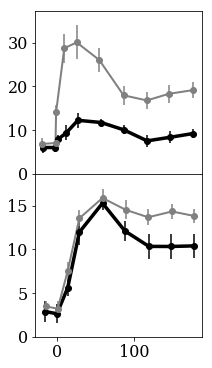

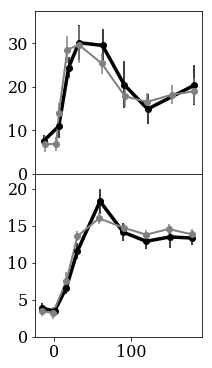

In [124]:
"""
Anorexia
Data from:
Abnormal Hypothalamic–Pituitary–Adrenal Function in Anorexia Nervosa
https://www.ncbi.nlm.nih.gov/pubmed/3010109
format (time, value, SE)
"""
ACTH_anorexia_pretreatment = np.matrix([[-15.26, 7.83, 0.84], [-0.1, 7.67, 1.33], [0.99, 10.0, 1.83], [15.29, 14.17, 1.83], [30.53, 16.5, 2.83], [60.78, 13.83, 1.67], [89.99, 10.33, 1.67], [120.32, 10.17, 1.83], [149.63, 9.67, 1.5], [179.99, 10.33, 1.5]])
ACTH_healthy_pretreatment = np.matrix([[-14.29, 6.67, 2.0], [-0.13, 6.67, 2.0], [3.14, 13.83, 1.67], [16.78, 28.33, 2.84], [29.97, 29.67, 4.0], [61.17, 25.5, 3.0], [90.24, 17.83, 1.84], [120.53, 16.5, 2.0], [150.92, 18.0, 1.83], [179.26, 18.83, 1.5]])
cortisol_anorexia_pretreatment = np.matrix([[-15.23, 25.83, 4.5], [-0.09, 25.0, 3.5], [14.39, 34.67, 4.0], [28.76, 41.0, 4.5], [60.27, 45.67, 3.66], [89.38, 39.17, 3.5], [118.57, 35.33, 3.0], [148.84, 33.33, 2.5], [179.08, 30.5, 3.33]])
cortisol_healthy_pretreatment = np.matrix([[-14.85, 7.0, 1.33], [-0.71, 6.5, 1.33], [13.73, 15.0, 2.0], [29.31, 27.17, 1.5], [60.83, 32.17, 1.5], [90.04, 29.0, 2.17], [119.31, 27.33, 1.84], [147.68, 28.83, 1.17], [178.99, 27.67, 1.16]])
ACTH_anorexia_posttreatment = np.matrix([[-17.88, 6.01, 1.35], [-2.8, 6.01, 1.01], [1.16, 7.87, 1.01], [12.16, 9.38, 1.69], [27.14, 12.25, 1.68], [57.31, 11.74, 0.84], [86.52, 10.06, 1.01], [116.76, 7.53, 1.35], [146.89, 8.37, 1.35], [176.01, 9.21, 1.01]])
ACTH_healthy_posttreatment = np.matrix([[-18.91, 6.85, 1.35], [-1.83, 7.02, 1.18], [-1.06, 14.1, 1.69], [9.5, 28.76, 3.37], [25.54, 30.11, 3.88], [54.82, 26.07, 2.86], [86.26, 17.98, 2.19], [116.45, 16.8, 2.02], [144.54, 18.31, 2.03], [175.67, 19.16, 1.85]])
cortisol_anorexia_posttreatment = np.matrix([[-15.0, 2.89, 1.16], [0.0, 2.63, 1.08], [14.0, 5.62, 1.0], [29.0, 11.95, 1.5], [59.0, 15.27, 0.75], [88.0, 12.09, 1.09], [119.0, 10.33, 1.42], [147.0, 10.32, 1.41], [178.0, 10.39, 1.33]])
cortisol_healthy_posttreatment = np.matrix([[-14.0, 3.47, 0.67], [1.0, 3.21, 0.84], [14.0, 7.54, 1.0], [29.0, 13.54, 0.91], [59.0, 15.86, 1.08], [89.0, 14.51, 1.08], [118.0, 13.66, 0.92], [149.0, 14.32, 0.83], [178.0, 13.8, 0.84]])
ACTH_healthy_ltm = np.matrix([[-12.29, 6.8, 1.81], [2.64, 6.8, 1.64], [6.1, 14.02, 2.29], [17.01, 28.44, 3.12], [32.0, 29.59, 4.26], [61.57, 25.33, 2.46], [91.91, 17.79, 2.46], [120.68, 16.48, 1.96], [152.62, 18.11, 2.14], [182.52, 18.93, 2.96]])
ACTH_anorexia_ltm = np.matrix([[-13.23, 7.62, 1.31], [5.89, 10.9, 2.62], [18.72, 24.34, 2.46], [32.04, 30.08, 3.94], [62.84, 29.43, 3.77], [91.09, 20.41, 5.41], [121.56, 14.84, 3.44], [181.61, 20.25, 4.59]])
cortisol_healthy_ltm = np.matrix([[-15.54, 3.47, 0.66], [-1.64, 3.23, 0.82], [15.7, 7.52, 1.23], [30.23, 13.61, 0.66], [58.33, 16.01, 0.74], [91.03, 14.71, 0.57], [119.8, 13.81, 0.58], [148.72, 14.57, 0.66], [179.49, 13.84, 0.74]])                              
cortisol_anorexia_ltm = np.matrix([[-15.5, 3.88, 0.74], [0.37, 3.48, 0.57], [15.61, 6.61, 0.82], [30.03, 11.55, 1.07], [59.55, 18.32, 1.72], [89.98, 14.13, 1.24], [119.71, 12.91, 1.07], [150.61, 13.5, 1.48], [179.44, 13.35, 0.9]])

plot_data(((ACTH_anorexia_pretreatment,ACTH_healthy_pretreatment),
           (cortisol_anorexia_pretreatment,cortisol_healthy_pretreatment)),
             1,dirname='ANOREXIA_DATA',fname='ACTH_PRETREATMENT')

plot_data(((ACTH_anorexia_posttreatment,ACTH_healthy_posttreatment),
           (cortisol_anorexia_posttreatment,cortisol_healthy_posttreatment)),
             1,dirname='ANOREXIA_DATA',fname='ACTH_POSTTREATMENT')

plot_data(((ACTH_anorexia_ltm,ACTH_healthy_ltm),
           (cortisol_anorexia_ltm,cortisol_healthy_ltm)),
             1,dirname='ANOREXIA_DATA',fname='ACTH_POSTTREATMENT_LONGTERM')


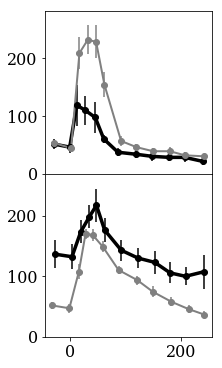

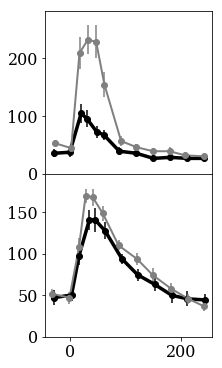

In [126]:
"""
Alcoholism.
Data from:
Human CRH stimulation response during acute withdrawal and after medium-term abstention from alcohol abuse
https://www.sciencedirect.com/science/article/pii/0306453089900437
"""

cortisol_control = np.matrix([[-31.3, 51.75, 5.92], [-0.61, 47.11, 7.43], [16.49, 107.75, 11.87], [28.47, 169.9, 8.88], [41.25, 168.33, 10.38], [59.37, 148.96, 8.89], [87.95, 110.27, 5.93], [121.35, 93.77, 7.42], [149.69, 74.33, 8.89], [183.09, 57.83, 7.42], [213.88, 45.79, 5.94], [242.08, 36.72, 5.93]])
cortisol_alcoholism_pretreatment = np.matrix([[-26.15, 136.44, 23.36], [4.11, 132.24, 20.44], [19.79, 173.21, 18.98], [35.26, 198.13, 18.94], [48.13, 217.18, 27.71], [62.78, 176.39, 20.44], [92.67, 143.0, 17.52], [122.82, 130.04, 16.06], [153.05, 122.93, 18.98], [180.62, 105.58, 17.53], [208.34, 99.91, 14.61], [241.27, 107.41, 27.74]])
cortisol_alcoholism_posttreatment = np.matrix([[-27.85, 47.27, 8.87], [3.15, 50.42, 7.39], [16.67, 97.91, 11.87], [35.29, 140.99, 11.85], [45.61, 141.05, 14.82], [63.51, 127.83, 10.37], [94.04, 93.95, 5.92], [122.18, 74.86, 7.41], [153.0, 63.2, 7.41], [183.79, 50.06, 8.89], [212.13, 45.79, 8.89], [243.08, 44.5, 7.4]])
ACTH_control = np.matrix([[-27.5, 53.1, 5.31], [2.5, 44.25, 5.31], [17.5, 208.85, 28.32], [32.5, 231.86, 24.78], [47.5, 228.32, 28.32], [62.5, 153.98, 21.24], [92.5, 56.64, 8.85], [120.0, 46.02, 5.31], [150.0, 38.94, 5.31], [180.0, 38.94, 7.08], [207.5, 31.86, 5.31], [242.5, 30.09, 3.54]])
ACTH_alcoholism_pretreatment = np.matrix([[-28.09, 51.33, 8.85], [0.0, 46.02, 10.62], [12.77, 118.58, 35.4], [28.09, 109.73, 24.78], [45.96, 97.35, 26.54], [61.28, 60.18, 7.08], [86.81, 37.17, 7.08], [120.0, 33.63, 7.08], [148.09, 30.09, 8.85], [178.72, 28.32, 7.08], [206.81, 28.32, 8.85], [240.0, 21.24, 5.31]])
ACTH_alcoholism_posttreatment = np.matrix([[-28.09, 35.4, 7.08], [0.0, 37.17, 8.85], [20.43, 104.42, 15.93], [30.64, 95.58, 14.15], [48.51, 72.57, 10.62], [61.28, 67.26, 8.85], [89.36, 38.94, 7.08], [120.0, 35.4, 5.31], [150.64, 26.55, 5.31], [181.28, 28.32, 3.54], [211.91, 26.55, 1.77], [242.55, 26.55, 1.77]])

ylim_acth=(0,270)
ylim_cortisol=(0,270)

plot_data(((ACTH_alcoholism_pretreatment,ACTH_control),
           (cortisol_alcoholism_pretreatment,cortisol_control)),
         1,dirname='ALCOHOLISM_BARDELEBEN',fname='ACTH_PRETREATMENT')

plot_data(((ACTH_alcoholism_posttreatment,ACTH_control),
           (cortisol_alcoholism_posttreatment,cortisol_control)),
         1,dirname='ALCOHOLISM_BARDELEBEN',fname='ACTH_POSTTREATMENT')


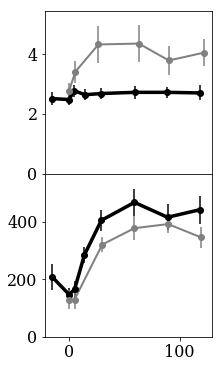

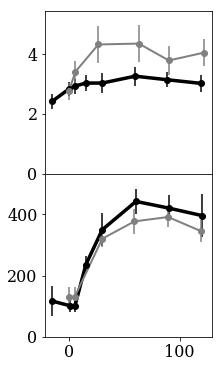

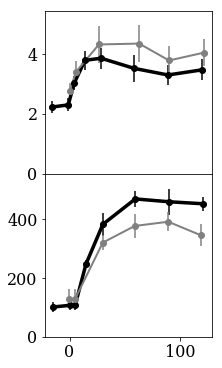

In [125]:
"""
Post-partum.
Data from:
Hypothalamic corticotropin-releasing hormone suppression during the postpartum period: implications for the increase in psychiatric manifestations at this time.
Magiakou MA1, Mastorakos G, Rabin D, Dubbert B, Gold PW, Chrousos GP.
https://www.ncbi.nlm.nih.gov/pubmed/8626857
"""

ACTH_early = np.matrix([[-15.0, 2.51, 0.22], [0.049999999999954525, 2.48, 0.19], [4.92999999999995, 2.77, 0.19], [14.629999999999995, 2.64, 0.19], [29.19999999999999, 2.68, 0.19], [59.309999999999974, 2.72, 0.22], [88.93999999999997, 2.72, 0.19], [118.55999999999997, 2.7, 0.25]])
ACTH_middle = np.matrix([[-15.0, 2.42, 0.25], [0.09000000000000341, 2.83, 0.22], [5.9199999999999875, 2.93, 0.25], [15.159999999999997, 3.03, 0.28], [30.209999999999994, 3.03, 0.32], [59.849999999999994, 3.26, 0.32], [88.98, 3.14, 0.25], [119.07999999999998, 3.02, 0.28]])
ACTH_late= np.matrix([[-15.72, 2.23, 0.19], [-1.15, 2.3, 0.22], [4.25, 3.03, 0.22], [14.02, 3.79, 0.32], [28.6, 3.86, 0.35], [58.68, 3.52, 0.44], [89.25, 3.3, 0.32], [119.86, 3.47, 0.35]])

cortisol_early = np.matrix([[-14.83, 207.0, 45.0], [0.28, 146.66, 21.0], [5.19, 164.55, 30.01], [14.09, 284.35, 27.0], [29.35, 404.01, 35.99], [59.24, 466.35, 48.0], [89.03, 414.69, 45.0], [118.4, 441.04, 47.98]])
cortisol_middle = np.matrix([[-15.0, 116.68, 47.99], [1.1299999999999955, 101.32, 21.01], [5.530000000000001, 101.23, 21.0], [15.419999999999987, 236.01, 27.0], [30.189999999999998, 349.68, 54.0], [60.59, 442.0, 42.01], [89.91999999999999, 420.35, 41.99], [120.22999999999999, 395.68, 69.0]])
cortisol_late= np.matrix([[-15.0, 101.26, 17.99], [0.17000000000001592, 106.92, 15.0], [5.060000000000002, 106.81, 14.99], [14.960000000000036, 247.59, 14.99], [30.230000000000018, 382.25, 39.0], [59.650000000000034, 468.6, 26.98], [90.46000000000004, 458.92, 44.98], [120.78000000000003, 452.24, 24.0]])


ACTH_control=np.matrix([[0.0, 2.75, 0.55/2], [5.95, 3.41, 0.74/2], [26.68, 4.32, 1.24/2], [63.15, 4.35, 1.21/2], [90.22, 3.785, 0.985/2], [122.27, 4.05, 0.88/2]])
cortisol_control = np.matrix([[-0.27, 129.315, 63.325/2], [5.13, 129.14, 66.28/2], [30.16, 320.095, 52.775/2], [59.13, 376.73, 82.92/2], [89.56, 391.115, 64.815/2], [119.02, 345.24, 73.87/2]])

ylim_acth=(1,8)
ylim_cortisol=(0,800)

experimental_results = {3*7 : (ACTH_early,cortisol_early),
                        6*7: (ACTH_middle,cortisol_middle), 
                        12*7 : (ACTH_late,cortisol_late)} 
for tscale,(ACTH_res,cort_res) in experimental_results.items():
    plot_data(((ACTH_res,ACTH_control),(cort_res,cortisol_control)),
             1,dirname='POSTPARTUM',fname='ACTH'+str(tscale))

# Figure 2

In [127]:
pars = dict([("gamma_h",np.log(2)/4),("gamma_p",np.log(2)/20),("gamma_a",np.log(2)/80),
             ("gamma_P",np.log(2)/(7*24*60)),("gamma_A",np.log(2)/(14*24*60)),
             ("gamma_R",0),("gamma_CR",0),
             ("gamma_external_CRH",np.log(2)/43)])

pars_no_turnover = pars.copy()
pars_no_turnover.update({"gamma_P" : 0, "gamma_A" : 0})


pars_gr_resistance = pars_no_turnover.copy()
pars_gr_resistance.update({"gamma_R" : np.log(2)/(30*24*60)})

pars_cr = pars_no_turnover.copy()
pars_cr.update({"gamma_CR" : np.log(2)/(30*24*60)})

names = ["CRH","ACTH","cortisol","corticotroph mass",
         "adrenal mass","external_CRH","stimulation (u)"]

MR = lambda a: np.divide(1,np.power(a,1))
GR = lambda a,kGR: np.divide(1,np.power(np.divide(a,kGR),3)+1)

def eqs(h, p, a, P, A,R,CR,ext_crh,kGR,u,external_crh,pars,t):
    stim_crh = h+ext_crh
    return [pars["gamma_h"]*(u(t)*MR(a)*GR(a,kGR/R)-h), 
            pars["gamma_p"]*(stim_crh*GR(a,kGR/R)*P-p), 
            pars["gamma_a"]*(A*p-a/CR),
            pars["gamma_P"]*P*(stim_crh-1),
            pars["gamma_A"]*A*(p-1),
            pars["gamma_R"]*(1-(1+a**2)*R),
            pars["gamma_CR"]*(a-CR),
            pars["gamma_external_CRH"] * (external_crh(t) - ext_crh)]




def pend(y,t,kGR,u,external_crh,pars):
    h, p, a, P, A,R,CR,ext_crh = y
    dydt = eqs(h, p, a, P, A,R,CR,ext_crh,kGR,u,external_crh,pars,t)
    
    return dydt

def run_through(u,kGR,external_crh,pars):
    simple_initvals = np.repeat(1,len(pars))
    
    t = np.linspace(0, 200*24*60,100)
    sol = odeint(pend, simple_initvals, t, args=(kGR,u,external_crh,pars))
    return sol[-1]


def calc_pulse_response(kGR,u0,y0,pars):
    external_crh = lambda t: 20 if t<30 else 0
    t = np.linspace(0, 4*60,1000)
    sol = odeint(pend, y0, t, args=(kGR,lambda t: u0,external_crh,pars))
    return sol,t,lambda t: u0


def max_response(kGR,u,t,sol,timepoint,pars):
    pulse_sol,pulse_t,_ = calc_pulse_response(kGR,u(t[timepoint]),sol[timepoint],pars)
    return np.max(pulse_sol,axis=0)

In [131]:
T_PULSE_START = 10
T_PULSE_END = 100
T_MAX = 200
vline_timepoints = [(T_PULSE_START,'ONSET',3.5),(T_PULSE_END-2,'EW',3.5),(T_PULSE_END+30,'IW',3),(T_MAX-10,'LW',3.5)]
kGR=4

def get_styles():
    # black,red,blue,yellow,dark green
    ALPHA_OTHER=0.75
    THICKNESS_OTHER=2.5
    styles = ((2.5,'k',1,'solid'),
              (THICKNESS_OTHER,'blue',ALPHA_OTHER,'solid'),
              (THICKNESS_OTHER,'red',ALPHA_OTHER,'solid'),
              (THICKNESS_OTHER,'purple',ALPHA_OTHER,'solid'),
              (THICKNESS_OTHER,'gray',ALPHA_OTHER,'solid'))
    return styles
def get_style_plasma(l):
    cmap = plt.get_cmap('plasma')
    return [(2,c,1,'solid') for c in cmap.colors[:cmap.N:int(cmap.N/l)]]

def calculate_withdrawal_dynamics(kGR,pars,pulse_min=1,pulse_max=4,
                                  pulse_start=T_PULSE_START,pulse_end=T_PULSE_END,
                                  max_time=T_MAX,slow_return_to_baseline=False):
    t = np.linspace(0, max_time*24*60 , int(max_time/1.05))
    def slow_pulse(tval):
        if tval < pulse_start*24*60:
            return pulse_min
        elif (tval >= pulse_start*24*60 and tval <= pulse_end*24*60):
            return pulse_max
        else:
            return pulse_min + (pulse_max-pulse_min)*np.exp(-(tval/(24*60)-pulse_end)/30)#(max_time-tval/(24.0*60))/(max_time-pulse_end)
    if slow_return_to_baseline:
        u = slow_pulse 
    else:
        u = lambda tval:pulse_max if tval > pulse_start*24*60 and tval < pulse_end*24*60 else pulse_min
    
    y0 = run_through(lambda t: u(0),kGR,lambda t: 0,pars)
    sol = odeint(pend, y0, t, args=(kGR,u,lambda t: 0,pars))
    
    return u,t, kGR, sol

def calc_withrdawal_dynamics_with_response(kGR,pars,slow_return_to_baseline):
    u,t, kGR, sol = calculate_withdrawal_dynamics(kGR,pars,slow_return_to_baseline=slow_return_to_baseline)
    baseline_response = max_response(kGR,u,t,sol,0,pars)
    response_sol = np.array([max_response(kGR,u,t,sol,timepoint,pars)/baseline_response for timepoint in range(len(t))])
    return {"dynamics" : sol,
            "response" : response_sol,
            "input" : u,
            "time" : t}
    
def generate_withdrawal_plot(sols,styles,t,name,tag='',marks=True,dirname='Addiction'):
    path = gen_dir(dirname)
    
    ax,fig = init_fig(aspect=(6,2))
    ax = ax[0]
    if marks:
        mx = 1.5*np.max(sols)
    else:
        mx = 1.05*np.max(sols)
    mn = 0.7*np.min(sols)
    for particular_sol,style in zip(sols,styles[:len(sols)]):
        width,col,alpha,s = style
        ax.plot(t/(24*60),particular_sol, color=col, ls=s,linewidth=width,alpha=alpha)
    ax.hlines(1,min(t),max(t)/(24*60),alpha=1,color='k',linestyles='dotted')
    
    if marks:
        for timepoint,phase,spc in vline_timepoints:
            tp =np.argmin(np.abs(t-timepoint*24*60))
            plt.vlines(timepoint,sols[0][tp],mx*0.8,linewidth=0.5)
            plt.text(timepoint-spc*len(phase),mx*0.85,phase,fontsize=14)
    plt.ylim((mn,mx))
    
    fig.savefig(os.path.join(path,tag + name.replace("$","").replace("\\","") + ".pdf"),bbox_inches='tight')



/Users/omerkarin/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


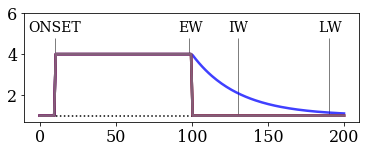

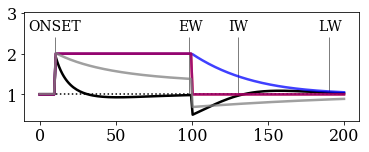

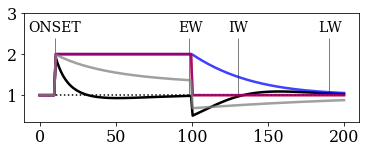

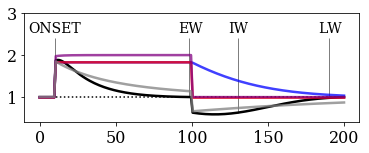

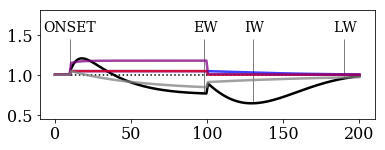

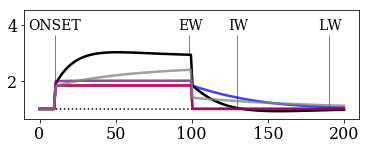

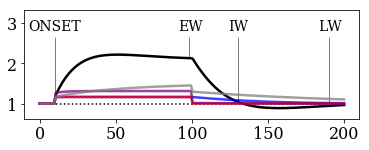

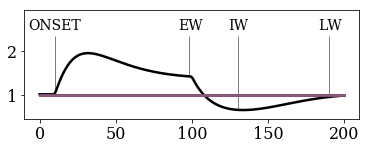

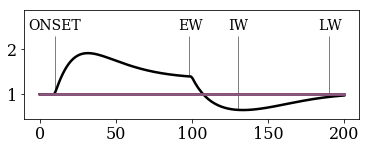

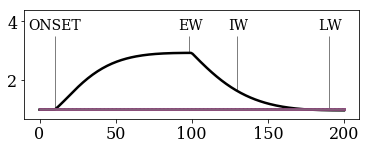

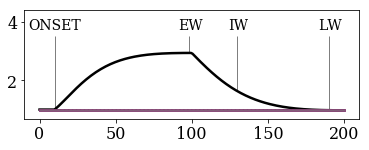

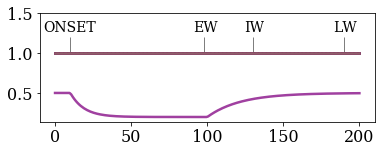

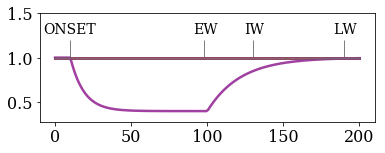

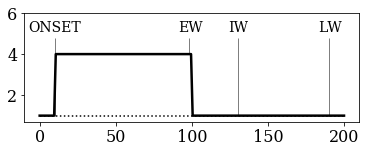

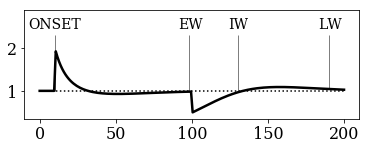

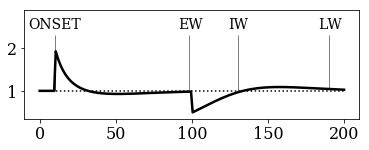

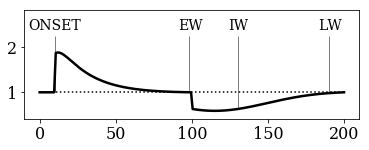

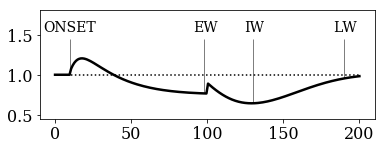

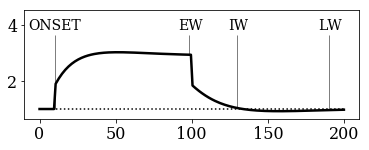

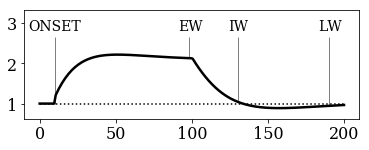

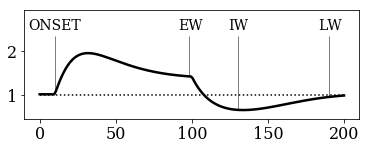

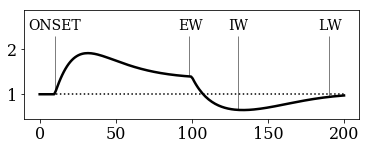

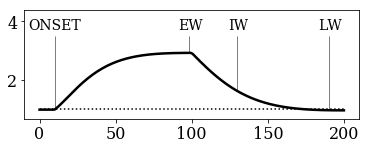

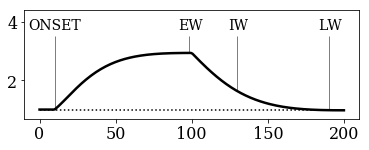

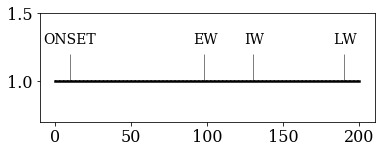

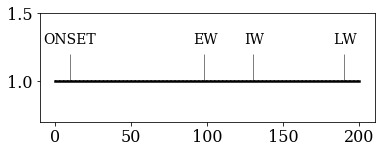

In [132]:
# Figure S1
output = []
for p,flag in ((pars,False),(pars_no_turnover,True),(pars_no_turnover,False),(pars_gr_resistance,False),(pars_cr,False)):
    output.append(calc_withrdawal_dynamics_with_response(kGR,p,flag))
t = output[0]['time']
generate_withdrawal_plot([[x["input"](timepoint) for timepoint in t] for x in output],get_styles(),t,'stress (u)')
for i in range(len(names)-1):
    generate_withdrawal_plot([x["dynamics"][:,i] for x in output],get_styles(),t,names[i])
    generate_withdrawal_plot([x["response"][:,i] for x in output],get_styles(),t,names[i],"dynamics_")
    
#Figure 3
generate_withdrawal_plot([[output[0]["input"](timepoint) for timepoint in t],],get_styles(),t,'stress (u)',dirname='withdrawal_clean')
for i in range(len(names)-1):
    generate_withdrawal_plot([output[0]["dynamics"][:,i],],get_styles(),t,names[i],dirname='withdrawal_clean')
    generate_withdrawal_plot([output[0]["response"][:,i],],get_styles(),t,names[i],"dynamics_",dirname='withdrawal_clean')

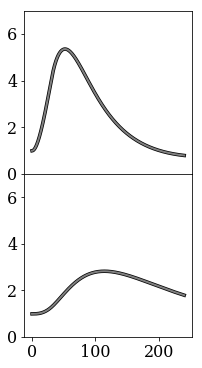

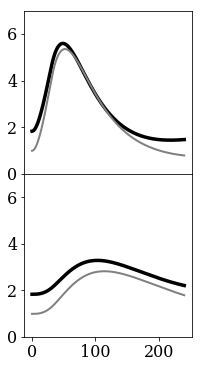

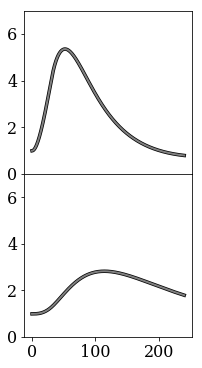

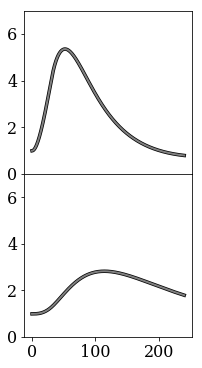

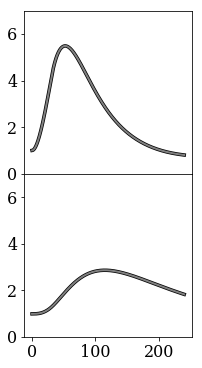

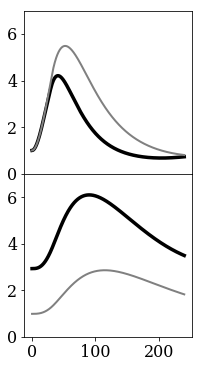

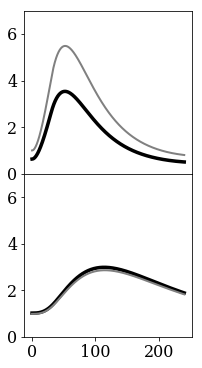

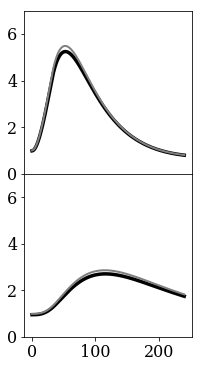

In [148]:
# Figure 2
def generate_crh_responses(kGR,pars,dirname):
    path = gen_dir(dirname)
    u,t, kGR, sol = calculate_withdrawal_dynamics(kGR,pars)
    for timepoint,phase,spc in vline_timepoints:
        tp =np.argmin(np.abs(t-timepoint*24*60))

        baseline,tpulse,_ = calc_pulse_response(kGR,u(0),sol[0],pars)
        axs,fig = init_fig(aspect=(3,6),n=2)
        for name,ax in zip(('ACTH','cortisol'),axs):
            response,tpulse,_ = calc_pulse_response(kGR,u(timepoint*24*60),sol[tp],pars)
            ax.plot(tpulse,response[:,names.index(name)], color='k',linewidth=3.5)
            ax.plot(tpulse,baseline[:,names.index(name)], color='gray',linewidth=2)
            ax.set_ylim((0,7))
        fig.savefig(os.path.join(path,'ACTH' +phase+ "_CRH_TEST.pdf"),bbox_inches='tight')

#u,t, kGR, sol = calculate_withdrawal_dynamics(kGR,pars)
generate_crh_responses(kGR,pars_no_turnover,dirname='Figure2A')
generate_crh_responses(kGR,pars,dirname='Figure2B')
        


In [ ]:
# Figure S2
kGR=4

turnovers = ((20,3),(14,7),(10,10),(7,14),(3,20))
all_pars = []
for turnover_a,turnover_p in turnovers:
    pars_temp = pars.copy()
    pars_temp.update({"gamma_P" : np.log(2)/(turnover_p*24*60), "gamma_A" : np.log(2)/(turnover_a*24*60)})
    all_pars.append(pars_temp)
    
output = [calc_withrdawal_dynamics_with_response(kGR,p,False) for p in all_pars]
t = output[0]['time']
for i in range(len(names)-1):
    generate_withdrawal_plot([x["dynamics"][:,i] for x in output],get_style_plasma(3),t,names[i],
                             marks=False,dirname="different_speeds")
    generate_withdrawal_plot([x["response"][:,i] for x in output],get_style_plasma(3),t,names[i],"dynamics_",
                             marks=False,dirname="different_speeds")

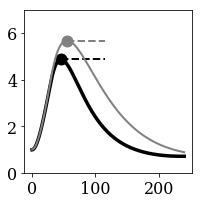

In [151]:
# Figure 3 - example
path = gen_dir('Addiction')
u,t, kGR, sol = calculate_withdrawal_dynamics(kGR,pars)

timepoint,phase,spc = vline_timepoints[1]
tp =np.argmin(np.abs(t-timepoint*24*60))

baseline,tpulse,_ = calc_pulse_response(kGR,u(0),sol[0],pars)
name='ACTH'
ylim=(0,7)
        
response,tpulse,_ = calc_pulse_response(kGR,u(timepoint*24*60),sol[tp],pars)
ax,fig = init_fig(aspect=(3,3))
ax = ax[0]
ax.plot(tpulse,response[:,names.index(name)], color='k',linewidth=3.5)
ax.plot(tpulse,baseline[:,names.index(name)], color='gray',linewidth=2)
response_tmax = tpulse[np.argmax(response[:,names.index(name)])]
baseline_tmax = tpulse[np.argmax(baseline[:,names.index(name)])]
response_max = np.max(response[:,names.index(name)])
baseline_max = np.max(baseline[:,names.index(name)])
ax.scatter(baseline_tmax,baseline_max,color='gray',s=120)
ax.hlines(baseline_max,baseline_tmax,max(tpulse)/2.1,linestyle='dashed',
          linewidth=2,color='gray')
ax.scatter(response_tmax,response_max,color='black',s=120)
ax.hlines(response_max,response_tmax,max(tpulse)/2.1,linestyle='dashed',
          linewidth=2,color='black')
#ax.vlines(tmax,response_max,baseline_max,color='#8200FF',linewidth=3)
ax.set_ylim(ylim)
fig.savefig(os.path.join(path,"CRH_TEST_EXAMPLE.pdf"),bbox_inches='tight')

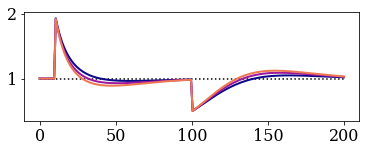

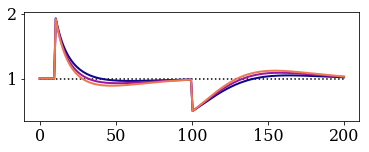

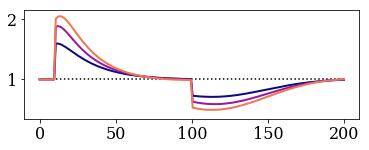

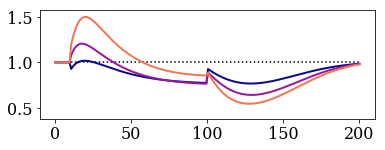

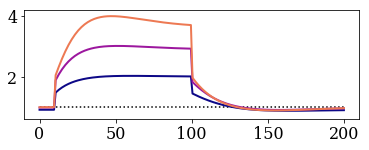

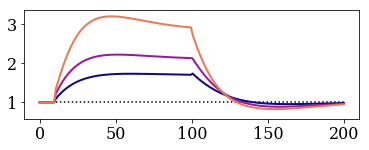

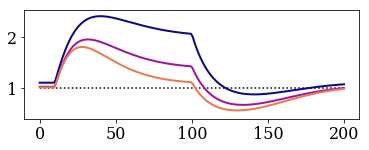

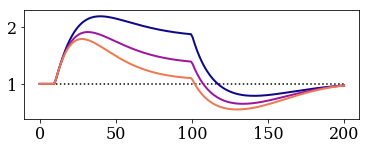

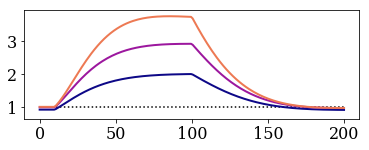

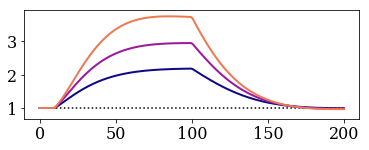

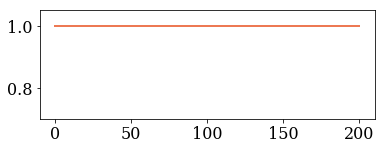

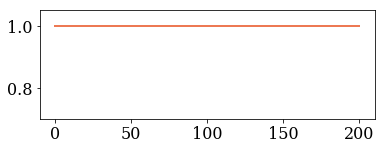

In [150]:
# Figure 4
kGRs = (2,4,8)
output = []
for kGR in kGRs:
    output.append(calc_withrdawal_dynamics_with_response(kGR,pars,False))
for i in range(len(names)-1):
    generate_withdrawal_plot([x["dynamics"][:,i] for x in output],get_style_plasma(3),t,names[i],marks=False,dirname="kGR_trajectories")
    generate_withdrawal_plot([x["response"][:,i] for x in output],get_style_plasma(3),t,names[i],"dynamics_",marks=False,dirname="kGR_trajectories")